In [1]:
#STUDY CASE : covid19 DATA ANALYSIS
#TWO DATABASE covid19_Confirmed_dataset and worldwide_happiness_report
#question: IS THERE ANY RELATIONSHIP BETWEEN THE SPREAD OF CORONA VIRUS IN SOME COUNTRIES AND HOW HAPPY PEOPLE ARE IN THAT COUNTRY  

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
#import the dataset
dataset = pd.read_csv("covid_case_study/covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
dataset.shape

(266, 104)

In [5]:
#delete the useless columns
dataset.drop(["Lat", "Long"], axis=1, inplace = True)

In [6]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
dataset['Country/Region'].value_counts()

Country/Region
China             33
Canada            15
France            11
United Kingdom    11
Australia          8
                  ..
Holy See           1
Honduras           1
Hungary            1
Iceland            1
Tajikistan         1
Name: count, Length: 187, dtype: int64

In [8]:
#aggregate the rows by country, here i could use set_index
corona_dataset_aggregated = dataset.groupby('Country/Region').sum()

In [9]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [20]:
corona_dataset_aggregated.shape

(187, 101)

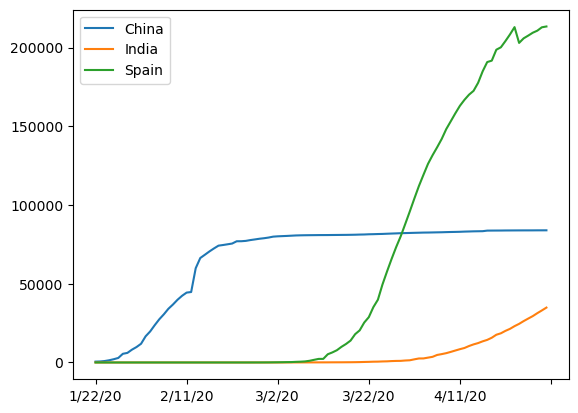

In [31]:
#visualise data related to country
corona_dataset_aggregated.loc["China", "1/22/20" : "4/30/20" ].plot()
corona_dataset_aggregated.loc["India", "1/22/20" : "4/30/20" ].plot()
corona_dataset_aggregated.loc["Spain", "1/22/20" : "4/30/20" ].plot()
plt.legend()

In [33]:
#calculate a good measure
corona_dataset_aggregated.loc["China", "1/22/20" : "4/30/20" ][:3] #spread of first three days

1/22/20    548
1/23/20    643
1/24/20    920
Name: China, dtype: object

<Axes: >

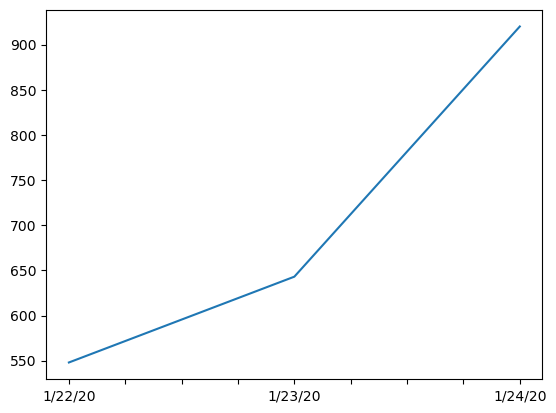

In [34]:
corona_dataset_aggregated.loc["China", "1/22/20" : "4/30/20" ][:3].plot()

In [10]:
#calculate the first derivate of the curve: 
#Calculer la première dérivée d'une courbe signifie trouver le taux de changement de la variable dépendante (nbre de cas) par rapport à la variable indépendante(le temps) .
#Variable indépendante (Temps) : C'est la variable que vous manipulez ou dont vous suivez l'évolution pour voir comment elle affecte la variable dépendante
#Variable dépendante (Nombre de cas) : C'est la variable que vous mesurez et qui change en réponse à la variable indépendante.
#.diff() est utilisée pour calculer la différence entre chaque valeur et la valeur précédente dans une série

corona_dataset_aggregated.loc["China", "1/22/20" : "4/30/20" ].diff()

1/22/20    NaN
1/23/20     95
1/24/20    277
1/25/20    486
1/26/20    669
          ... 
4/26/20      3
4/27/20      6
4/28/20     22
4/29/20      4
4/30/20     12
Name: China, Length: 100, dtype: object

<Axes: >

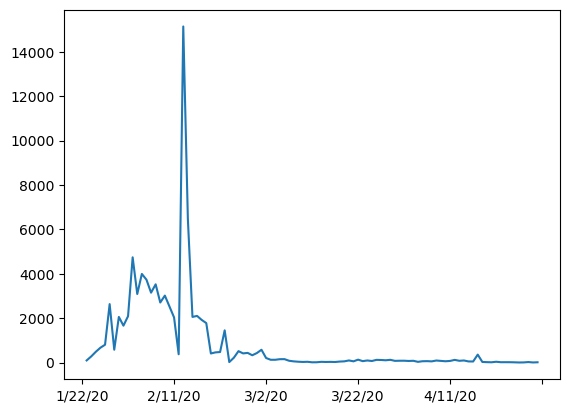

In [11]:
corona_dataset_aggregated.loc["China", "1/22/20" : "4/30/20" ].diff().plot()

In [12]:
#maximum infection rate
corona_dataset_aggregated.loc["China", "1/22/20" : "4/30/20" ].diff().max() #for china

15136

In [13]:
corona_dataset_aggregated.loc["India", "1/22/20" : "4/30/20" ].diff().max() #for india

1893

In [14]:
corona_dataset_aggregated.loc["Spain", "1/22/20" : "4/30/20" ].diff().max() #for spain

9630

In [15]:
#maximum infection rate for the whole countries
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c, "1/22/20" : "4/30/20" ].diff().max())
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates

In [16]:
corona_dataset_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5


In [88]:
#create a new dataframe
corona_data = pd.DataFrame(corona_dataset_aggregated['Max_infection_rates'])

In [89]:
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5
...,...
West Bank and Gaza,66
Western Sahara,4
Yemen,5


In [90]:
#importing the dataset of happyness report
happiness_report = pd.read_csv("covid_case_study/worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [91]:
happiness_report.shape

(156, 9)

In [92]:
#droping the useless columns
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [93]:
happiness_report.drop(useless_cols, axis=1, inplace = True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [94]:
happiness_report.set_index("Country or region", inplace = True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [95]:
#join the dataset
#Utilisez join() lorsque vous souhaitez fusionner deux DataFrames en utilisant leur index ou pour ajouter des colonnes d'un DataFrame à un autre.
#Utilisez concat() lorsque vous devez concaténer plusieurs DataFrames le long d'un axe (soit en ajoutant des lignes, soit en ajoutant des colonnes).
#Utilisez merge() lorsque vous avez besoin de combiner deux DataFrames en utilisant une ou plusieurs colonnes comme clé, de manière similaire aux jointures SQL.

# L'inner join renvoie uniquement les lignes des deux DataFrames qui ont des valeurs correspondantes dans les colonnes spécifiées.
#Le left join renvoie toutes les lignes du DataFrame de gauche (premier DataFrame dans la méthode de jointure) et les lignes correspondantes du DataFrame de droite. Si aucune correspondance n'est trouvée, les valeurs manquantes dans les colonnes du DataFrame de droite sont remplies par des NaN.
#Le right join est similaire au left join mais renvoie toutes les lignes du DataFrame de droite et les lignes correspondantes du DataFrame de gauche. Les lignes du DataFrame de droite qui n'ont pas de correspondance dans le DataFrame de gauche auront des valeurs NaN dans les colonnes du DataFrame de gauche.
#L'outer join renvoie toutes les lignes des deux DataFrames, avec des valeurs NaN là où il n'y a pas de correspondance. C'est une fusion complète des ensembles de données.

In [96]:
corona_data.shape

(187, 1)

In [97]:
happiness_report.shape

(156, 4)

In [98]:
data = corona_data.join(happiness_report, how = "inner")
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29,0.960,1.427,0.805,0.154
Vietnam,19,0.741,1.346,0.851,0.543
Yemen,5,0.287,1.163,0.463,0.143
Zambia,9,0.578,1.058,0.426,0.431


In [99]:
data["Max_infection_rates"].max()

26849

In [100]:
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<Axes: >

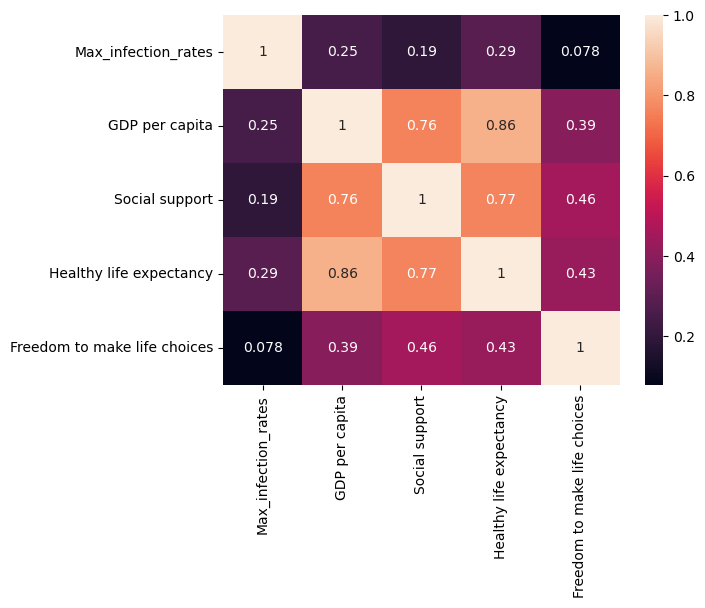

In [101]:
data.corr()
sns.heatmap(data.corr(), annot=True, )

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

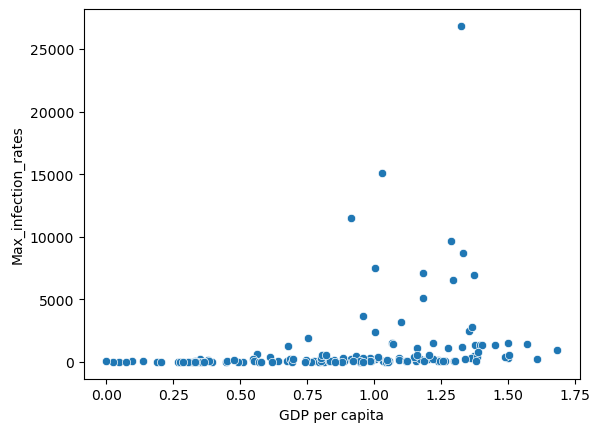

In [102]:
#visualisation
x = data["GDP per capita"]
y = data["Max_infection_rates"]

sns.scatterplot(x= x,y= y)

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

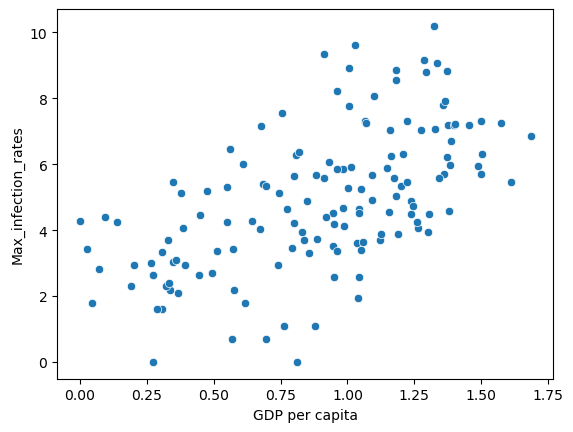

In [112]:
x = data["GDP per capita"]
y = data["Max_infection_rates"]

sns.scatterplot(x= x,y= np.log(y)) 


<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

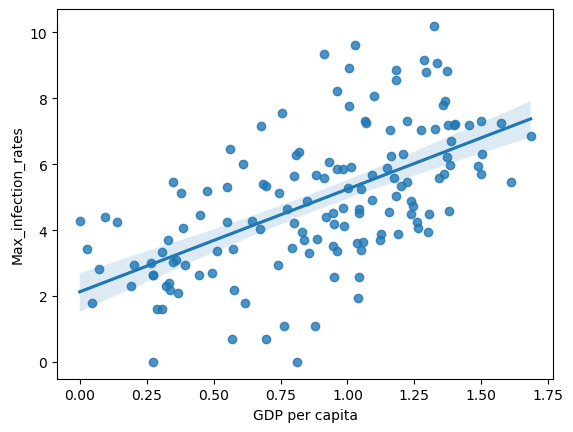

In [104]:
sns.regplot(x= x,y= np.log(y))

#sns.regplot() de seaborn est utilisée pour créer un scatter plot avec une ligne de régression ajustée aux données

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

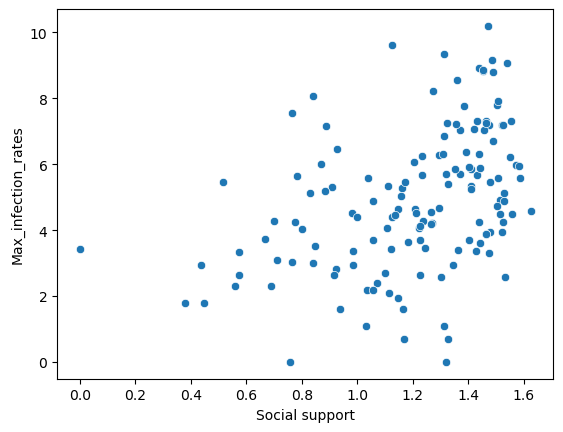

In [105]:
x = data["Social support"]
y = data["Max_infection_rates"]

sns.scatterplot(x = x, y = np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

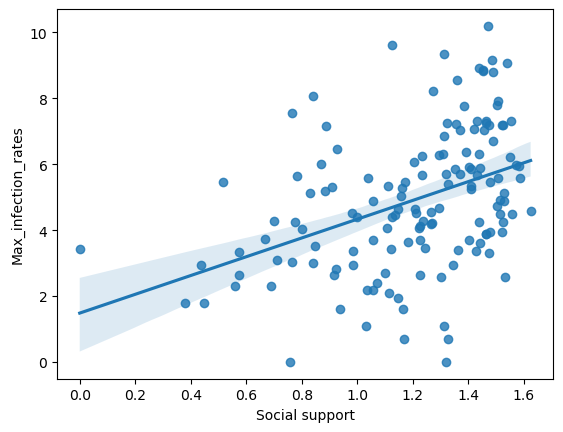

In [106]:
x = data["Social support"]
y = data["Max_infection_rates"]

sns.regplot(x = x, y = np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

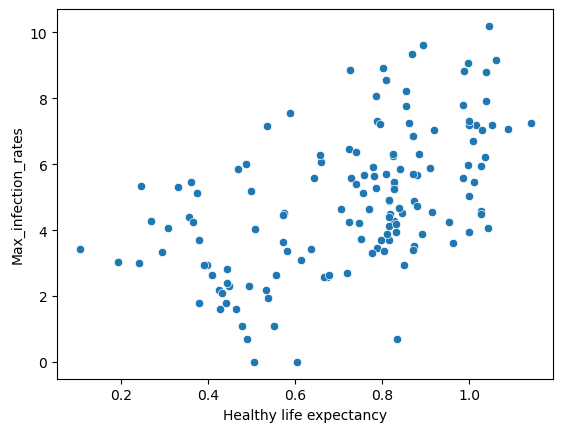

In [107]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]

sns.scatterplot(x = x, y = np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

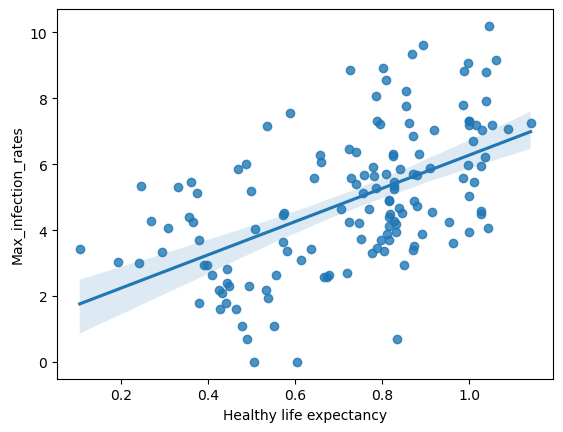

In [108]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]

sns.regplot(x = x, y = np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

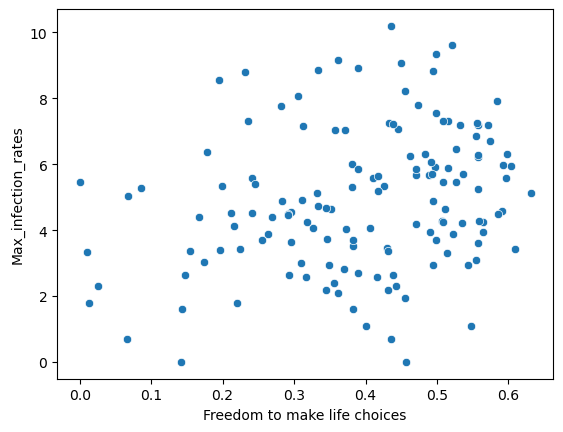

In [109]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]

sns.scatterplot(x = x, y = np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

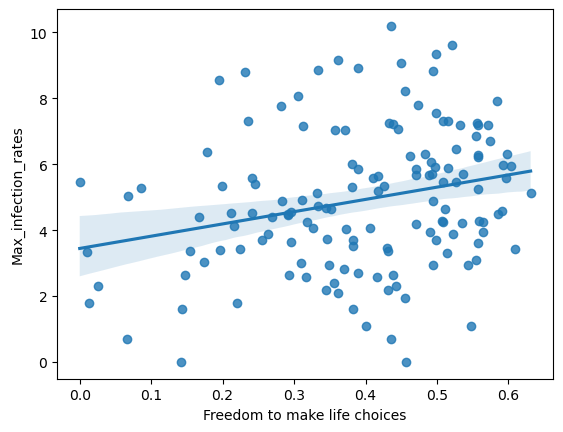

In [110]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]

sns.regplot(x = x, y = np.log(y))